# Практическая работа №3: Статистический анализ социальных сетей
Выполнил студент гр. 0382 Ильин Денис. Вариант №34.

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения


## Основные теоретические положения

**Диада** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними: $D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** $-$ тройка чисел $M, A, N$, где:

Вычисление цензуса:  
$M = \frac{1}{2} trace(𝐗𝐗)$  
$A = trace(𝐗𝐗^{T}) - 2M$  
$N = C_g^2 - A - M$  

**Индекс взаимности Каца-Пауэлла** (Reciprocity of Katz and Powell) $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

$-\infty < \rho_{кр} \leqslant 1$.

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

Для фиксированного выбора из $d$ акторов:

$\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.

Вероятность того, что связь будет взаимной для двух акторов:

$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$

Для свободного выбора:

$\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):

$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}$.

**Индекс взаимности Бандиопадхьяйя** - индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}}$,

где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g$,

$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g$,

$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+})$.

**Вычисление доверительного интервала для оценки P:**

Оценка параметра $P$:

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}$.

ДИ: $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{upper} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$, где $\alpha$ - некоторый уровень значимости, $(1 - \alpha)$ - доверительная надёжность. 

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [1]:
import networkx as nx
import numpy as np
import math
from scipy.stats import norm

1. Смоделировать случайный орграф
$𝔊_d$ на основе модели Эрдеша—Реньи: $𝔊_d = 𝔊(g, 𝑝)$, где $g$ – количество акторов, $𝑝$ – вероятность появления дуги между акторами. Ознакомьтесь с данной моделью и опишите
её.


In [2]:
g, p, P_0, alpha = 68, 0.65, 0.50, 0.03

graph = nx.erdos_renyi_graph(g, p, directed=True)

> В данном случае модель следующая: каждая пара из $g$ вершин с вероятностью $p$ соединяется ребром (пары упорядочены, так как ребра направленные). Также существует вариант модели когда задана не вероястность появления ребра, а количество ребёр $M$. В этом случае в качестве результата выбирается случайный граф из всех возможных графов на $g$ вершинах с $M$ ребрами (предполагается что выбор графа осуществялется на основе равномерного распределения). 

2. Отобразить полученный орграф.

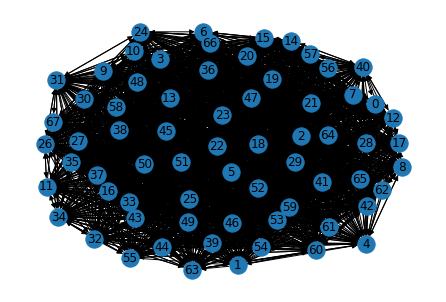

In [3]:
nx.draw_kamada_kawai(graph, with_labels=True)

3. Вычислить «пятичисловую сводку» для графа $𝔊_d$.

In [4]:
graph.number_of_nodes()


68

In [5]:
nx.density(graph)

0.6503511852502195

In [6]:
nx.number_strongly_connected_components(graph)

1

In [15]:
# diameter
max([max(j.values()) for _, j in nx.shortest_path_length(graph)])

2

In [8]:
nx.transitivity(graph)

0.6489860573077587

4. Вычислить цензус диад. Сделать выводы.

In [9]:
matr = nx.to_numpy_array(graph)
tr = np.matmul(matr, matr).trace()
M = 1/2 * tr
A = np.matmul(matr, np.transpose(matr)).trace() - tr
N = math.comb(g, 2) - A - M
f'<{M}, {A}, {N}>'

'<974.0, 1015.0, 289.0>'

> Вывод: в построенном графе 974 взаимные диады, 1015 ассиметричных диад и 289 нулевых диад.

5. Вычислить оценку индекса взаимности Каца—Пауэла.

* При фиксированом выборе акторов $d$:

In [10]:
d = g * p
rho_kp_fixed = lambda d: (2 * (g - 1) * M - g * d * d) / (g * d * (g - 1 - d))
rho_kp_fixed(d)

-0.03402304003287458



 * При свободном выборе:



In [11]:
L = nx.number_of_edges(graph)
L_2 = sum(sum(x) ** 2 for x in matr)
rho_kp_free = (2 * (g - 1) ** 2 * M - L * L + L_2) / (L * (g - 1) ** 2 - L * L + L_2)
rho_kp_free

0.020569115844870072

6. Вычислить вероятность того, что связь будет взаимной.

* При фиксированом выборе акторов $d$:

In [12]:
d / (g - 1) * (d / (g - 1)  + rho_kp_fixed(d) * (g - 1 - d)/(g - 1))

0.42756804214223004



 * При свободном выборе:



In [13]:
d / (g - 1) * (d / (g - 1)  + rho_kp_free * (g - 1 - d)/(g - 1))

0.43982373182976753

> Выводы: вероятности получились примерно одинаковы и близки к $p^2 = 0.434$ (как и ожидается, если наличие дуги от  $j$  к  $i$ практически не зависит от наличия дуги от  $i$  к  $j$).

7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [14]:
f_t = lambda t: sum(sum(matr[i]) for i in range(0, t)) - t * (g - 1) - math.comb(t, 2)
g_t = lambda t: sum(sum(matr[i]) for i in range(0, t)) - t * (t - 1) - sum(min(t, sum(matr[i])) for i in range(t, g))
M_min = f_t(max(range(0, g + 1), key=f_t))
M_max =  (nx.number_of_edges(graph) - g_t(max(range(0, g + 1), key=g_t))) // 2
rho_b = (M - M_min) / (M_max - M_min)
rho_b

0.6576637407157326

> Вывод: из всех возможных взаимных диад в графе присутствует примерно $66$ процентов.



8. Проверить нулевую гипотезу о том, что число дуг $𝐿$ в орграфе
$𝔊_d$ имеет биномиальное распределение $𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2)$ при
уровне значимости $𝛼$. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [16]:
l = nx.number_of_edges(graph)
z_l = (l - g * (g - 1) / 2) / (g * (g - 1) / 4) ** (1 / 2)
p_val = norm.sf(abs(z_l))
p_val >= alpha / 2, p_val

(False, 6.854377665222693e-92)

9. Проверить нулевую гипотезу о том, что число дуг $𝐿$ в орграфе
$𝔊_d$
имеет биномиальное распределение $𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃_0)$ при уровне
значимости 𝛼. Определить максимальный уровень значимости при
котором нулевая гипотеза не отвергается.


In [17]:
l = nx.number_of_edges(graph)
z_l = (l - g * (g - 1) * P_0) / (P_0 * (1 - P_0) * g * (g - 1)) ** (1 / 2)
p_val = norm.sf(abs(z_l))
p_val >= alpha / 2, p_val

(False, 6.854377665222693e-92)

10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [18]:
l = nx.number_of_edges(graph)
p_hat = l / (g * (g - 1))
dif = norm.sf(alpha / 2) * (p_hat * (1 - p_hat)/(g * (g - 1))) ** (1/2)
p_low = p_hat - dif
p_up = p_hat + dif
[p_low, p_up]

[0.6468610742888891, 0.65384129621155]

> Выводы: можно заметить, что доверительный интервал очень маленький, это позволяет достаточно точно оценить вероятность появления дуги. Также видно, что числа из интервала близки к искомой вероятности $P_0 = 0.65$.

## Выводы

В ходе работы был проведён статистический анализ графа, построенного при помощи модели Эрдеша—Реньи.

В ходе анализа получены следующие результаты:
* вероятность появления взаимной диады близка к $p^2 = 0.434$;
* наличие дуги между вершинами практически не влияет на наличие обратной дуги;
* граф содержит примерно 66% из всех возможных взаимных диад;
* гипотеза $𝐿 ∼ Bin(𝑔(𝑔−1), 1/2)$ отвергается;
* гипотеза $𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃_0)$ отвергается;
* истинная вероятность $p$ входит в ДИ.